# Introduction

Exploration of google trends, unemployment rate, TSLA stock price and BTC price.

*   List item
*   List item

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters

# Read the Data

In [ ]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

In [ ]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [ ]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [ ]:
print(f'Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [ ]:
df_tesla.shape

(124, 3)

### Unemployment Data

In [ ]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [ ]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


In [ ]:
df_unemployment.shape

(181, 3)

### Bitcoin

In [ ]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [ ]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [ ]:
print(f'largest BTC News Search: {df_btc_search.BTC_NEWS_SEARCH.max()}')

largest BTC News Search: 100


In [ ]:
df_btc_search.describe()

,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


In [ ]:
df_btc_price.describe()

,CLOSE,VOLUME
count,2203.000000,2.203000e+03
mean,4429.421245,8.043622e+09
std,4148.150071,1.176529e+10
min,178.102997,5.914570e+06
25%,433.629502,6.029915e+07
50%,3637.520020,2.018890e+09
75%,7997.372803,1.322478e+10
max,19497.400391,7.415677e+10


# Data Cleaning

### Check for Missing Values

In [ ]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [ ]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [ ]:
print(f'Number of missing values: {df_btc_price.isna().sum()}')

Number of missing values: DATE      0
CLOSE     1
VOLUME    1
dtype: int64


In [ ]:
df_btc_price[df_btc_price.CLOSE.isna()]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


In [ ]:
df_btc_price[df_btc_price.VOLUME.isna()]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


Remove missing values. 

In [ ]:
df_btc_price.dropna(inplace = True)

In [ ]:
df_btc_price[df_btc_price.CLOSE.isna()]

,DATE,CLOSE,VOLUME


### Convert Strings to DateTime Objects

In [ ]:
print(type(df_tesla.MONTH[2]))
print(type(df_unemployment.MONTH[2]))
print(type(df_btc_search.MONTH[2]))
print(type(df_btc_price.DATE[2]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [ ]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)

In [ ]:
print(type(df_tesla.MONTH[2]))
print(type(df_unemployment.MONTH[2]))
print(type(df_btc_search.MONTH[2]))
print(type(df_btc_price.DATE[2]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [ ]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.7
1,2004-02-01,33,5.6
2,2004-03-01,25,5.8
3,2004-04-01,29,5.6
4,2004-05-01,23,5.6


In [ ]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09-01,5
1,2014-10-01,4
2,2014-11-01,4
3,2014-12-01,4
4,2015-01-01,5


In [ ]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


### Converting from Daily to Monthly Data


In [ ]:
df_btc_price_monthly = df_btc_price.resample('M', on='DATE').last()

In [ ]:
df_btc_price_monthly.head()

,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,34707300.0
2014-10-31,2014-10-31,338.321014,12545400.0
2014-11-30,2014-11-30,378.046997,9194440.0
2014-12-31,2014-12-31,320.192993,13942900.0
2015-01-31,2015-01-31,217.464005,23348200.0


In [ ]:
type(df_btc_price_monthly.index[0])

pandas._libs.tslibs.timestamps.Timestamp

# Data Visualisation

### Notebook Formatting & Style Helpers

In [ ]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

In [ ]:
# Register date converters
register_matplotlib_converters()

### Tesla Stock Price v.s. Search Volume

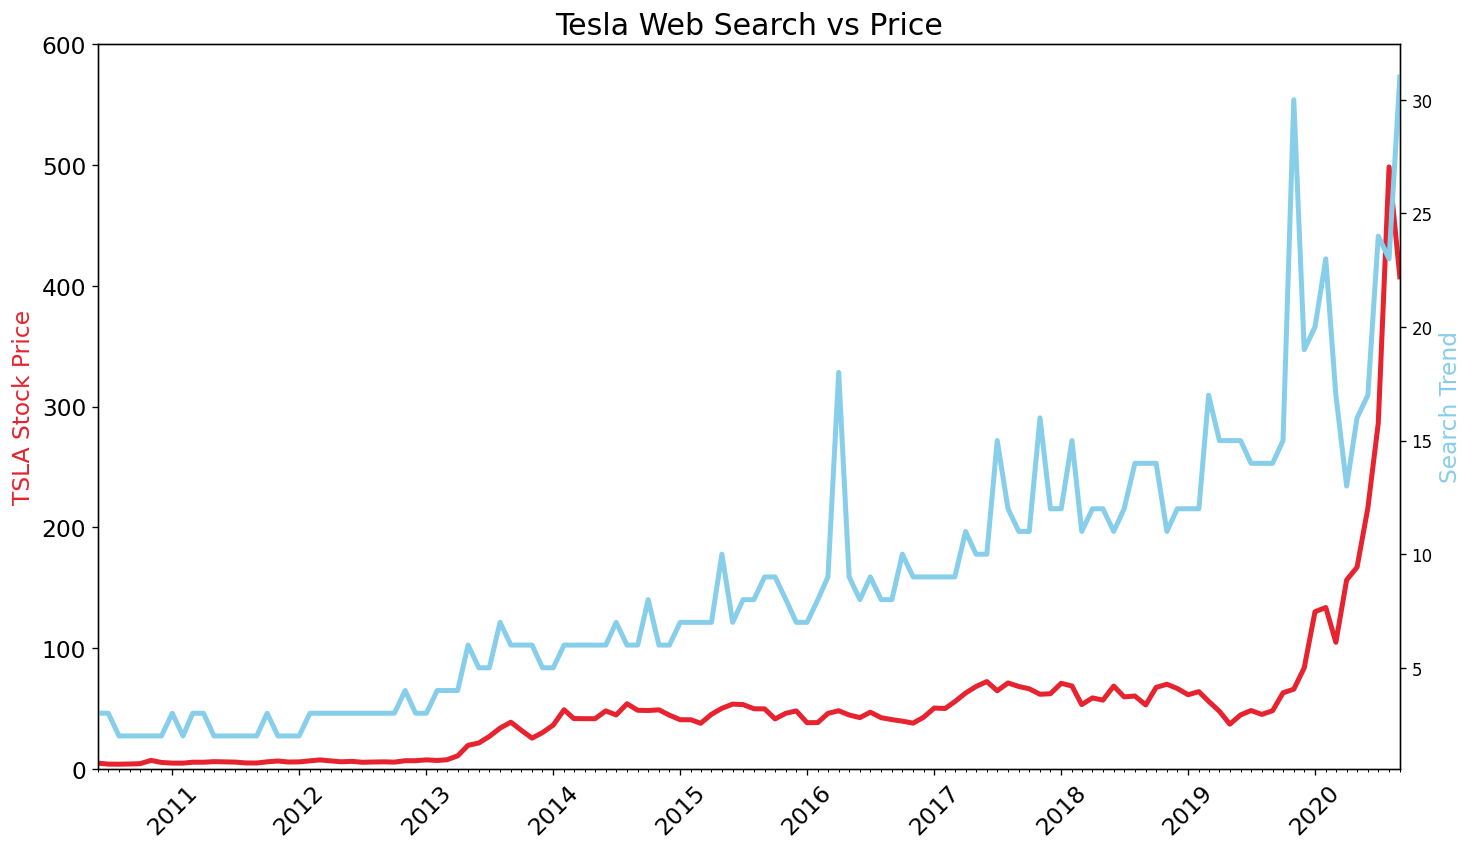

In [ ]:
plt.figure(figsize=(14, 8), dpi=120)

plt.title(label='Tesla Web Search vs Price', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price', color = '#E6232E', fontsize=14)
ax2.set_ylabel('Search Trend', color = 'skyblue', fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#E6232E', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue', linewidth=3)

plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

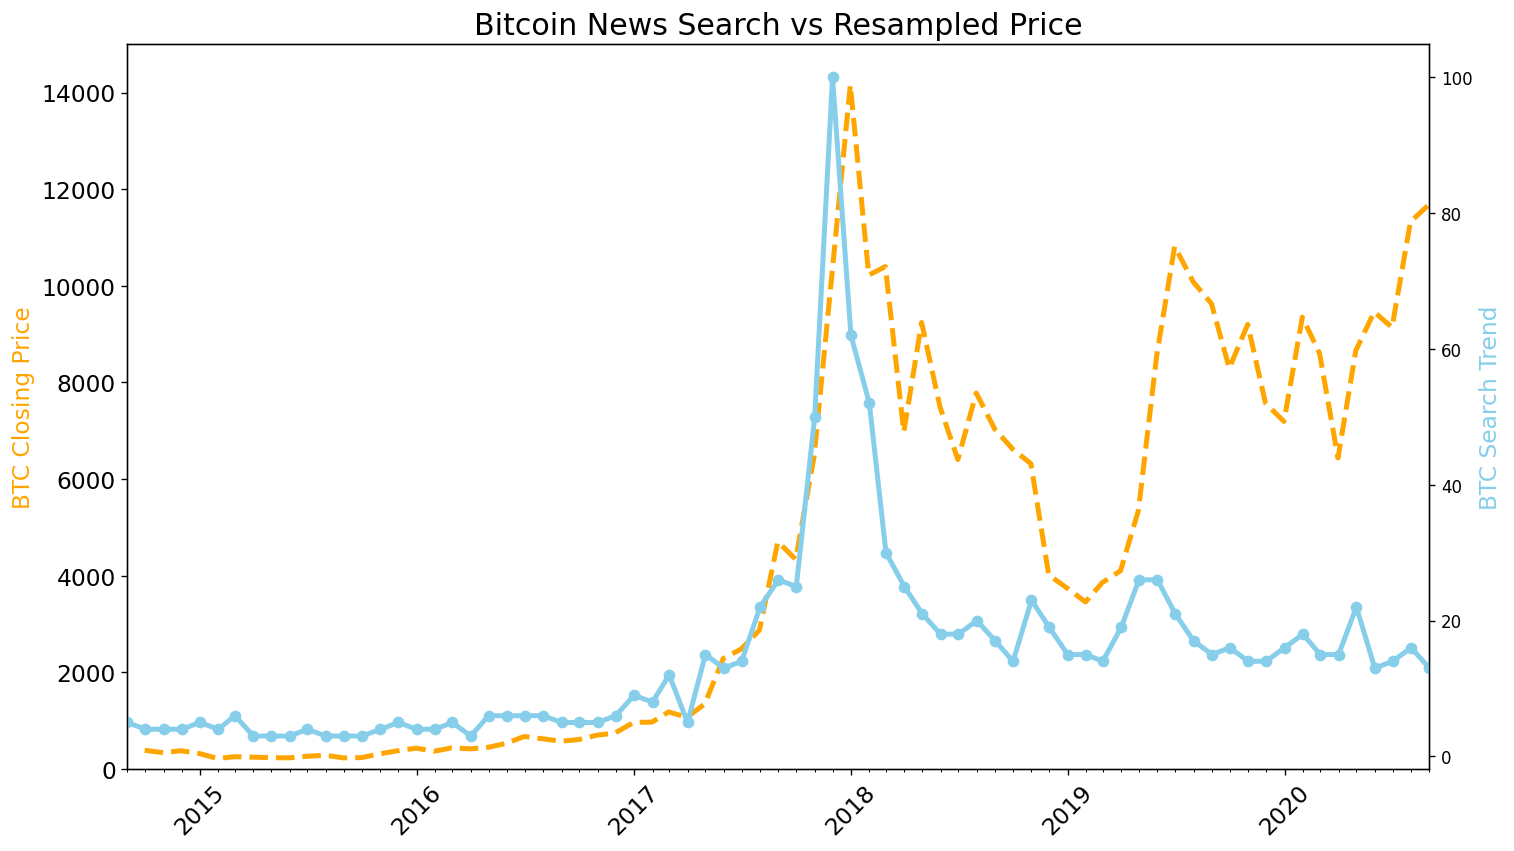

In [ ]:
plt.figure(figsize=(14, 8), dpi=120)

plt.title(label='Bitcoin News Search vs Resampled Price', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax1.set_ylim([0, 15000])
ax1.set_xlim([df_btc_search.MONTH.min(), df_btc_search.MONTH.max()])
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('BTC Closing Price', color = 'orange', fontsize=14)
ax2.set_ylabel('BTC Search Trend', color = 'skyblue', fontsize=14)


ax1.plot(df_btc_price_monthly.index, df_btc_price_monthly.CLOSE, color='orange', linewidth=3, linestyle='dashed')
ax2.plot(df_btc_search.MONTH, df_btc_search.BTC_NEWS_SEARCH, color='skyblue', linewidth=3, marker='o')

plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

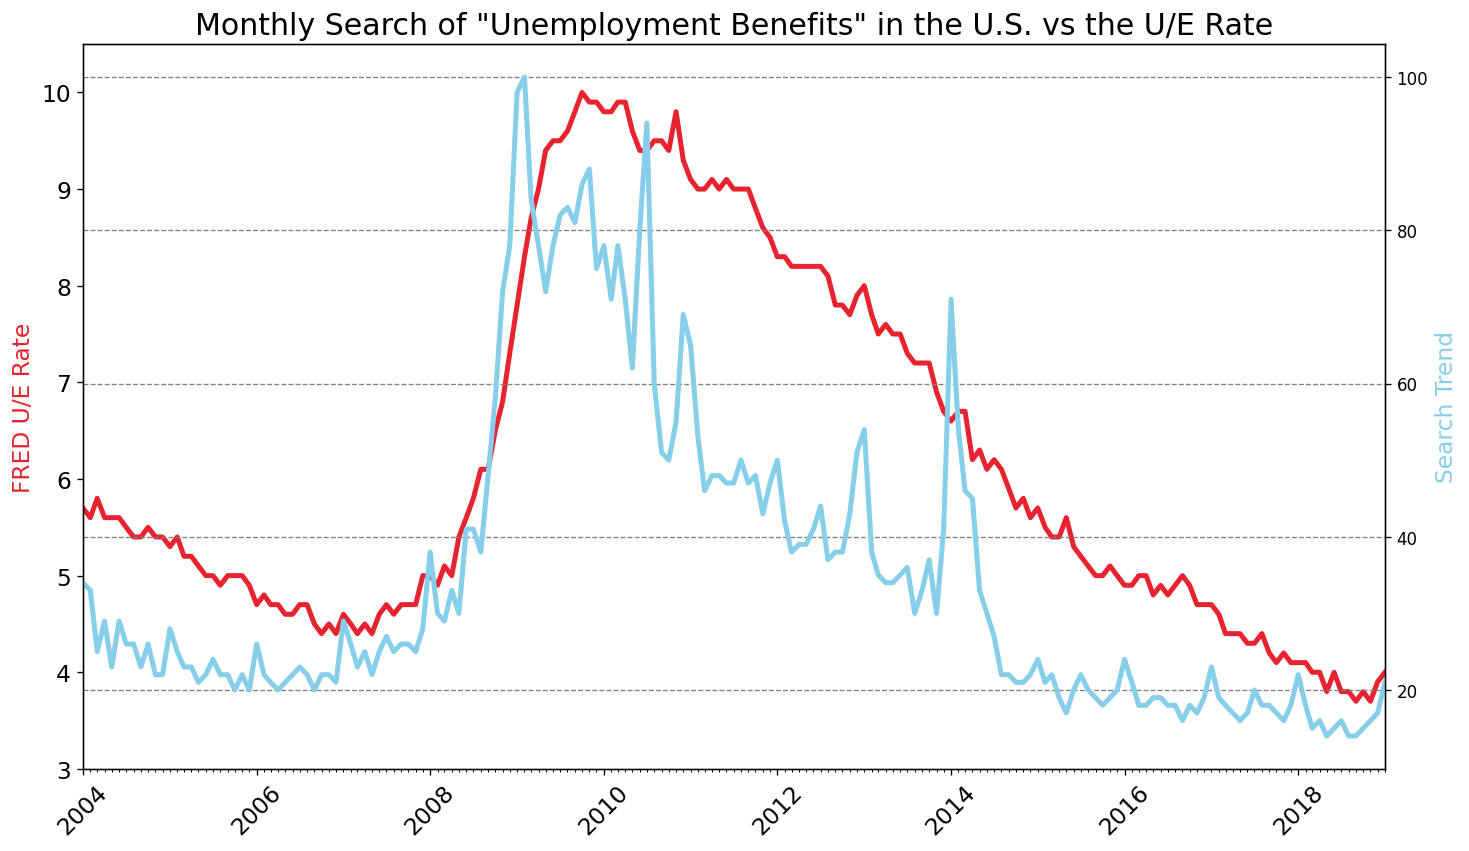

In [ ]:
plt.figure(figsize=(14, 8), dpi=120)

plt.title(label='Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

plt.grid(color='grey', linestyle='dashed')

ax1.set_ylabel('FRED U/E Rate', color = '#E6232E', fontsize=14)
ax2.set_ylabel('Search Trend', color = 'skyblue', fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim([3, 10.5])
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color='#E6232E', linewidth=3)

ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, color='skyblue', linewidth=3)

plt.show()

#### Smoothing out seasonality

In [ ]:
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

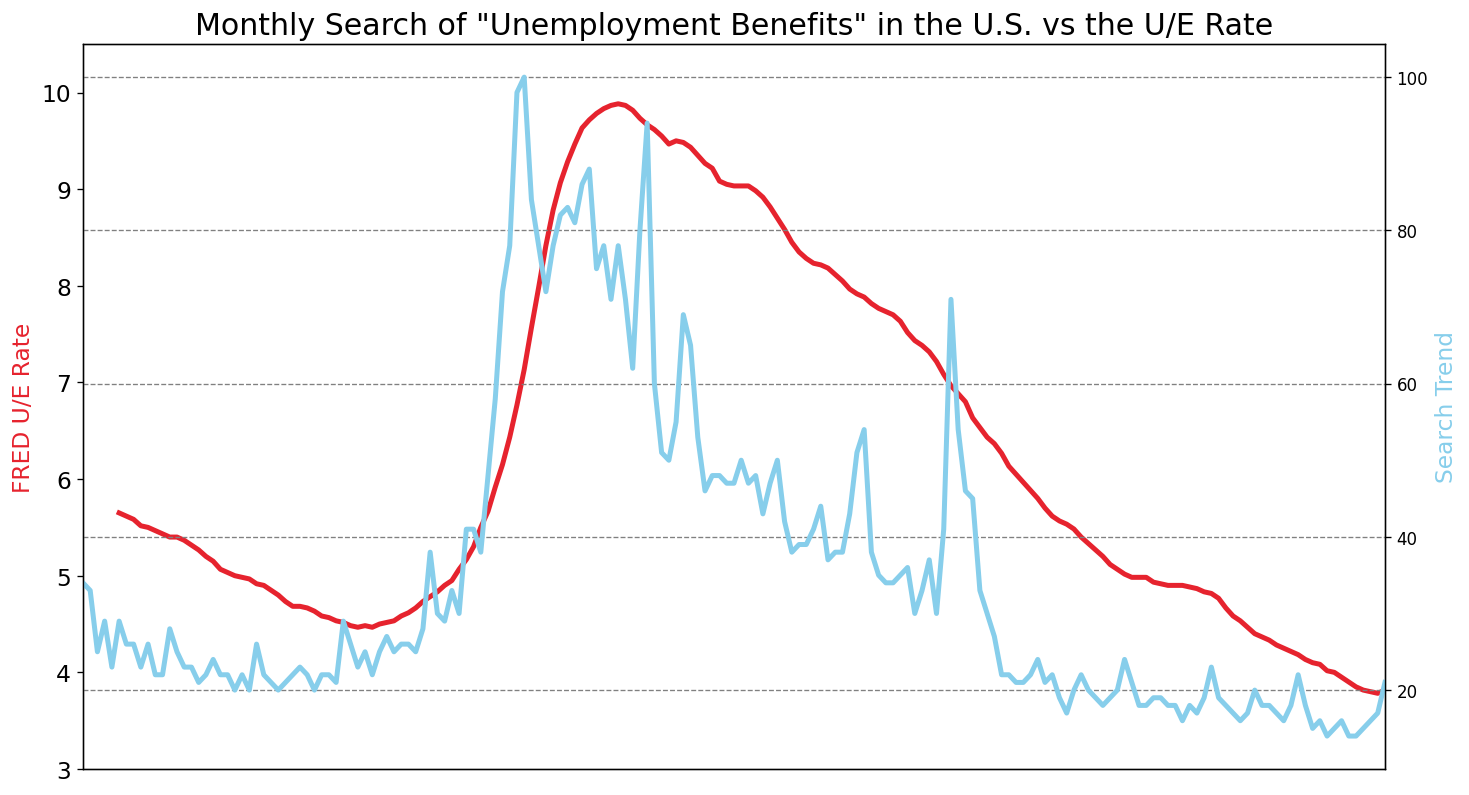

In [ ]:
plt.figure(figsize=(14, 8), dpi=120)

plt.title(label='Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

plt.grid(color='grey', linestyle='dashed')

ax1.set_ylabel('FRED U/E Rate', color = '#E6232E', fontsize=14)
ax2.set_ylabel('Search Trend', color = 'skyblue', fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim([3, 10.5])
ax1.set_xlim([roll_df.index.min(), roll_df.index.max()])

ax1.plot(roll_df.index, roll_df.UNRATE, color='#E6232E', linewidth=3)

ax2.plot(df_unemployment.index, df_unemployment.UE_BENEFITS_WEB_SEARCH, color='skyblue', linewidth=3)

plt.show()

### Including 2020 in Unemployment Charts

In [ ]:
df_ue_2020 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')

In [ ]:
df_ue_2020.MONTH = pd.to_datetime(df_ue_2020.MONTH)

In [ ]:
type(df_ue_2020.MONTH[0])

pandas._libs.tslibs.timestamps.Timestamp

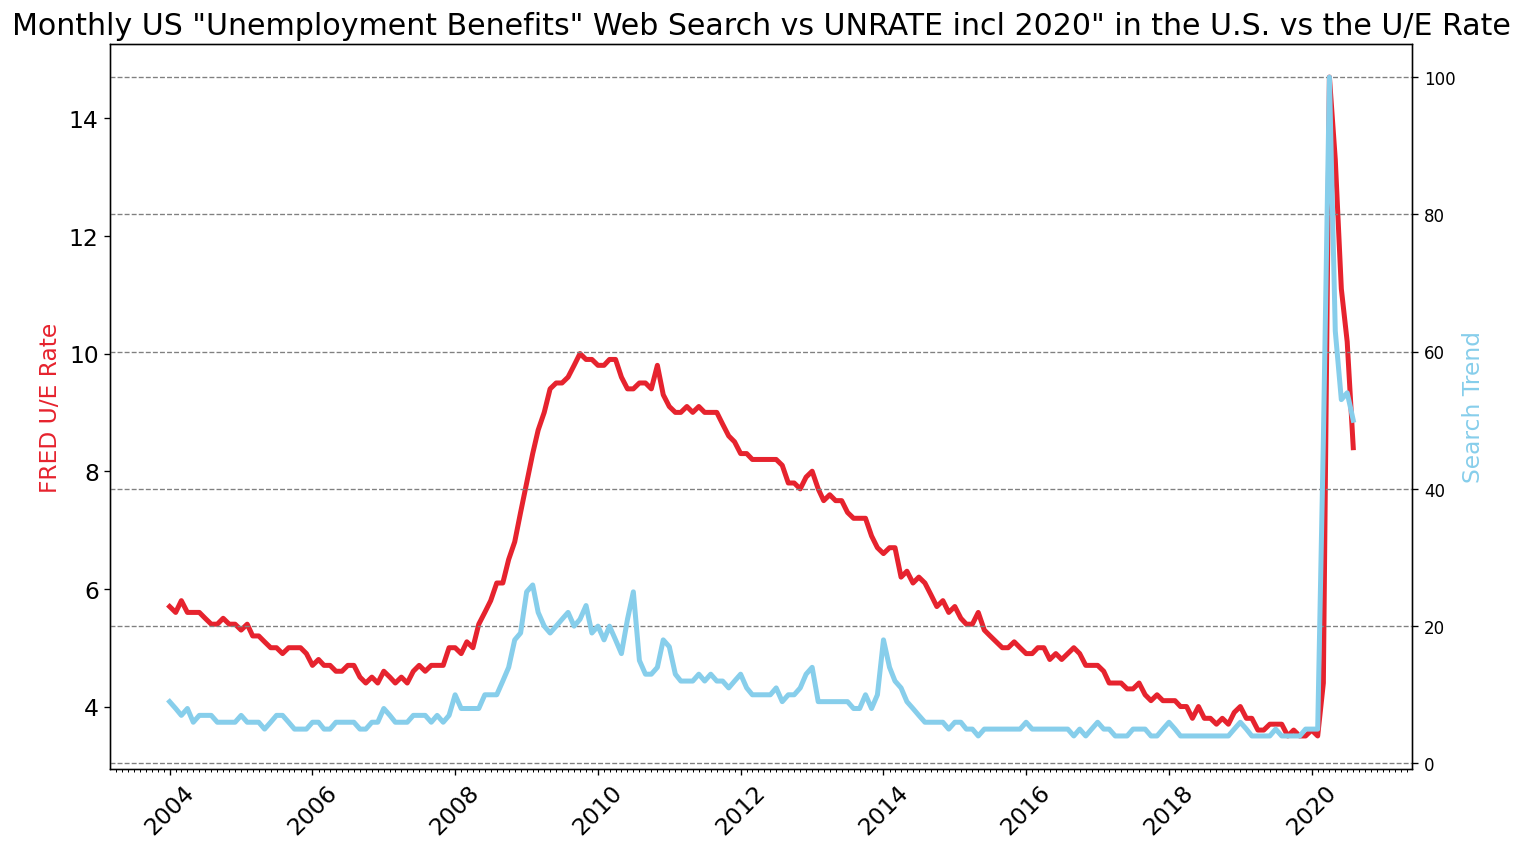

In [ ]:
plt.figure(figsize=(14, 8), dpi=120)

plt.title(label='Monthly US "Unemployment Benefits" Web Search vs UNRATE incl 2020" in the U.S. vs the U/E Rate', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

plt.grid(color='grey', linestyle='dashed')

ax1.set_ylabel('FRED U/E Rate', color = '#E6232E', fontsize=14)
ax2.set_ylabel('Search Trend', color = 'skyblue', fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)


ax1.plot(df_ue_2020.MONTH, df_ue_2020.UNRATE, color='#E6232E', linewidth=3)

ax2.plot(df_ue_2020.MONTH, df_ue_2020.UE_BENEFITS_WEB_SEARCH, color='skyblue', linewidth=3)

plt.show()